# The Battle of Neighborhoods

## Segmentation Sydney

In [28]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
import json
from pandas.io.json import json_normalize
%matplotlib inline

### Create a dataframe containing geolocation data of Sydney

In [29]:
syd_df = pd.read_csv("sydney_geolocation.csv")
syd_df.head()

,postcode,suburb,state,dc,type,lat,lon
0,1001,SYDNEY,NSW,EAST SUBS MC,LVR,-33.794883,151.268071
1,1002,SYDNEY,NSW,EAST SUBS MC,LVR,-33.794883,151.268071
2,1003,SYDNEY,NSW,EAST SUBS MC,LVR,-33.794883,151.268071
3,1004,SYDNEY,NSW,EAST SUBS MC,LVR,-33.794883,151.268071
4,1005,SYDNEY,NSW,GPO BOX CENTRE,LVR,-33.794883,151.268071


Remove the attributes of the dataframe that we do not need so our dataframe is clean and neat

In [30]:
syd_df.drop(['state', 'dc', 'type'], axis=1, inplace=True)
syd_df.head()

,postcode,suburb,lat,lon
0,1001,SYDNEY,-33.794883,151.268071
1,1002,SYDNEY,-33.794883,151.268071
2,1003,SYDNEY,-33.794883,151.268071
3,1004,SYDNEY,-33.794883,151.268071
4,1005,SYDNEY,-33.794883,151.268071


Rename the columns name for better understanding and easier processing

In [31]:
syd_df.columns = ['PostalCode', 'City', 'Latitude', 'Longitude']
syd_df

,PostalCode,City,Latitude,Longitude
0,1001,SYDNEY,-33.794883,151.268071
1,1002,SYDNEY,-33.794883,151.268071
2,1003,SYDNEY,-33.794883,151.268071
3,1004,SYDNEY,-33.794883,151.268071
4,1005,SYDNEY,-33.794883,151.268071
5,1006,SYDNEY,-33.794883,151.268071
6,1007,SYDNEY,-33.794883,151.268071
7,1008,SYDNEY,-33.794883,151.268071
8,1009,SYDNEY,-33.794883,151.268071
9,1010,SYDNEY,-33.794883,151.268071


In [32]:
address = 'Sydney'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geographical coordinate of Sydney city are {}, {}".format(latitude, longitude))

C:\Users\Luqman Hakim\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geographical coordinate of Sydney city are -33.8548157, 151.2164539


In [33]:
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, postal_code, city in zip(syd_df['Latitude'], 
                                       syd_df['Longitude'], 
                                       syd_df['PostalCode'], 
                                       syd_df['City'] ):
    label = '{}, {}'.format(city, postal_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=5, 
                        popup=label, 
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7).add_to(map_sydney)
    
map_sydney

### Explore the Neighborhood in Sydney

In [34]:
CLIENT_ID = 'UUNFJ1AY3XVOH5CNC1HGZSMU3LGUVWIVAYQ4DDKJZAUESURA'
CLIENT_SECRET = 'GUM2NDBB2MEJOWJIQYCCYDYZGEPOJGSMY1GLU2CLPKDTYI1T'
VERSION = '20181110'

In [35]:
def getNearbyVenues(postal_codes, latitudes, longitudes, radius=500, limit=10):
    venues_list=[]
    for postal_code, lat, lng in zip(postal_codes, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            postal_code, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
sydney_venues = getNearbyVenues(postal_codes = syd_df['PostalCode'],
                                   latitudes = syd_df['Latitude'],
                                   longitudes = syd_df['Longitude'])

In [37]:
print(sydney_venues.shape)
sydney_venues.head()

(1598, 7)


,PostalCode,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1001,-33.794883,151.268071,Porters Liquor,-33.794094,151.262936,Liquor Store
1,1001,-33.794883,151.268071,Fish Cafe,-33.793634,151.264552,Café
2,1001,-33.794883,151.268071,Tamagawa,-33.794480,151.265620,Japanese Restaurant
3,1001,-33.794883,151.268071,Sushi Roll,-33.793226,151.264882,Japanese Restaurant
4,1001,-33.794883,151.268071,Stockland Balgowlah,-33.793207,151.264932,Shopping Mall


In [38]:
print('{} unique categories'.format(len(sydney_venues['Venue Category'].unique())))

54 unique categories


In [39]:
sydney_venues.groupby('PostalCode').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
PostalCode,,,,,,
1001,10,10,10,10,10,10
1002,10,10,10,10,10,10
1003,10,10,10,10,10,10
1004,10,10,10,10,10,10
1005,10,10,10,10,10,10
1006,10,10,10,10,10,10
1007,10,10,10,10,10,10
1008,10,10,10,10,10,10
1009,10,10,10,10,10,10


### Analyze Each Postal Code

In [40]:
sydney_onehot = pd.get_dummies(sydney_venues[['Venue Category']], prefix="", prefix_sep="")

sydney_onehot['PostalCode'] = sydney_venues['PostalCode']

fixed_columns = [sydney_onehot.columns[-1]] + list(sydney_onehot.columns[:-1])
sydney_onehot = sydney_onehot[fixed_columns]

sydney_onehot.head()

,PostalCode,Airport,Airport Lounge,Argentinian Restaurant,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Breakfast Spot,...,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Spanish Restaurant,Speakeasy,Supermarket,Thai Restaurant,Theater,Trail
0,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
sydney_onehot.shape

(1598, 55)

In [42]:
sydney_grouped = sydney_onehot.groupby('PostalCode').mean().reset_index()
sydney_grouped.head()

,PostalCode,Airport,Airport Lounge,Argentinian Restaurant,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Breakfast Spot,...,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Spanish Restaurant,Speakeasy,Supermarket,Thai Restaurant,Theater,Trail
0,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
1,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
2,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
3,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0
4,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0


In [43]:
sydney_grouped.shape

(163, 55)

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicator[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
pc_venues_sorted = pd.DataFrame(columns=columns)
pc_venues_sorted['PostalCode'] = sydney_grouped['PostalCode']

for ind in np.arange(sydney_grouped.shape[0]):
    pc_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sydney_grouped.iloc[ind, :], num_top_venues)
    
pc_venues_sorted

,PostalCode,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1001,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
1,1002,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
2,1003,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
3,1004,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
4,1005,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
5,1006,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
6,1007,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
7,1008,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
8,1009,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop
9,1010,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop


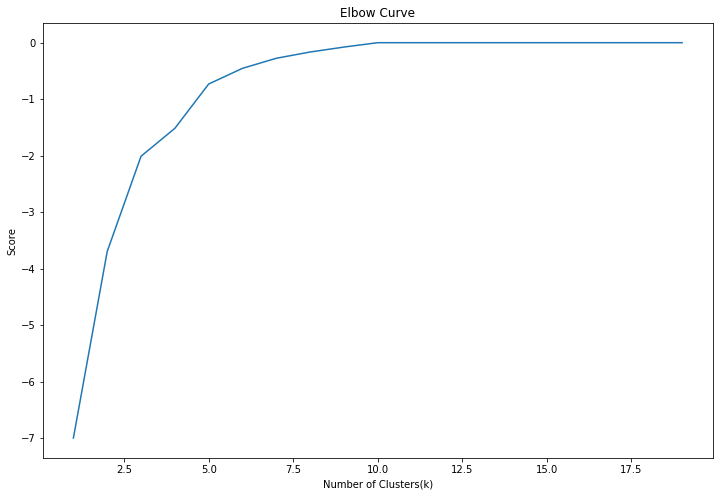

In [46]:
Y = sydney_grouped.drop('PostalCode', 1)

N = range(1,20)
kmeans =[KMeans(n_clusters = i) for i in N]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

plt.figure(1, figsize=(12,8))
plt.plot(N, score)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

From the Elbow Curve, we can see that the elbow is at k = 5. This indicate that the best number of cluster is 5.

In [47]:
kclusters = 5

kmeans_sydney = KMeans(n_clusters=kclusters, random_state=0).fit(Y)
kmeans_sydney.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 4, 4, 2, 2])

In [49]:
sydney_merged = pc_venues_sorted
sydney_merged['Cluster Labels'] = kmeans_sydney.labels_

sydney_merged = sydney_merged.join(syd_df.set_index('PostalCode'), on='PostalCode')

sydney_merged.head()

,PostalCode,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,City,Latitude,Longitude
0,1001,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop,0,SYDNEY,-33.794883,151.268071
1,1002,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop,0,SYDNEY,-33.794883,151.268071
2,1003,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop,0,SYDNEY,-33.794883,151.268071
3,1004,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop,0,SYDNEY,-33.794883,151.268071
4,1005,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store,Chinese Restaurant,Supermarket,Gym,Electronics Store,Duty-free Shop,0,SYDNEY,-33.794883,151.268071


In [50]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, postal_code, city, cluster in zip(sydney_merged['Latitude'],
                                                sydney_merged['Longitude'], 
                                                sydney_merged['PostalCode'], 
                                                sydney_merged['City'],
                                                sydney_merged['Cluster Labels']):
    label = '{}, {}. Cluster {}'.format(city, postal_code, cluster+1)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lon], 
                        radius=5,
                        popup=label,
                        color=rainbow[cluster-1],
                        fill=True,
                        fill_color=rainbow[cluster-1],
                        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

### Examine Clusters

#### Cluster 1

In [51]:
sydney_merged.loc[sydney_merged['Cluster Labels'] == 0, sydney_merged.columns[[0,13,14,1,2,3,4,5]]]

,PostalCode,Latitude,Longitude,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1001,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
1,1002,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
2,1003,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
3,1004,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
4,1005,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
5,1006,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
6,1007,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
7,1008,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
8,1009,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store
9,1010,-33.794883,151.268071,Café,Japanese Restaurant,Grocery Store,Shopping Mall,Liquor Store


First cluster made up of cafes, restaurant, shopping and groceries. 

#### Cluster 2

In [52]:
sydney_merged.loc[sydney_merged['Cluster Labels'] == 1, sydney_merged.columns[[0,13,14,1,2,3,4,5]]]

,PostalCode,Latitude,Longitude,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
139,1231,-33.815551,151.042528,Middle Eastern Restaurant,Thai Restaurant,Supermarket,Pier,Climbing Gym
140,1232,-33.815551,151.042528,Middle Eastern Restaurant,Thai Restaurant,Supermarket,Pier,Climbing Gym
141,1233,-33.815551,151.042528,Middle Eastern Restaurant,Thai Restaurant,Supermarket,Pier,Climbing Gym
142,1234,-33.815551,151.042528,Middle Eastern Restaurant,Thai Restaurant,Supermarket,Pier,Climbing Gym
143,1235,-33.815551,151.042528,Middle Eastern Restaurant,Thai Restaurant,Supermarket,Pier,Climbing Gym


Second cluster made of restaurants, supermarket and climbing gym.

#### Cluster 3

In [53]:
sydney_merged.loc[sydney_merged['Cluster Labels'] == 2, sydney_merged.columns[[0,13,14,1,2,3,4,5]]]

,PostalCode,Latitude,Longitude,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
153,1466,-33.906561,151.234417,Bus Station,Café,Hostel,Hotel,Trail
154,2000,-33.867139,151.207114,Thai Restaurant,Chinese Restaurant,Café,Noodle House,Dumpling Restaurant
154,2000,-33.877718,151.205723,Thai Restaurant,Chinese Restaurant,Café,Noodle House,Dumpling Restaurant
156,2006,-33.887926,151.186923,Café,Public Art,Library,Coffee Shop,Music Venue
157,2020,-33.931479,151.184989,Hotel,Airport Lounge,Australian Restaurant,Airport,Rental Car Location
157,2020,-33.932035,151.168700,Hotel,Airport Lounge,Australian Restaurant,Airport,Rental Car Location
158,2052,-33.906561,151.234417,Bus Station,Café,Hostel,Hotel,Trail
161,2060,-33.838265,151.206481,Café,Bar,Japanese Restaurant,Bakery,Sandwich Place
161,2060,-33.837788,151.208276,Café,Bar,Japanese Restaurant,Bakery,Sandwich Place
162,2129,-33.871209,151.191884,Fish Market,Seafood Restaurant,Italian Restaurant,Pub,Butcher


Third cluster contain hotels, restaurants, bars, markets, airport and other interesting tourist preferred spots. This region is the best area to establish our client's steakhouse.

#### Cluster 4

In [54]:
sydney_merged.loc[sydney_merged['Cluster Labels'] == 3, sydney_merged.columns[[0,13,14,1,2,3,4,5]]]

,PostalCode,Latitude,Longitude,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
22,1032,-33.662834,150.874182,Electronics Store,Trail,Chinese Restaurant,Grocery Store,Fish Market
49,1117,-33.664575,150.870220,Electronics Store,Trail,Chinese Restaurant,Grocery Store,Fish Market
64,1132,-33.662790,150.874265,Electronics Store,Trail,Chinese Restaurant,Grocery Store,Fish Market


Fourth cluster contains electronics store, restaurant and groceries. This region is more suitable for Sydney residents.

#### Cluster 5

In [55]:
sydney_merged.loc[sydney_merged['Cluster Labels'] == 4, sydney_merged.columns[[0,13,14,1,2,3,4,5]]]

,PostalCode,Latitude,Longitude,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue
159,2055,-33.802837,151.104935,Playground,Restaurant,Trail,Argentinian Restaurant,Chinese Restaurant
160,2059,-33.802837,151.104935,Playground,Restaurant,Trail,Argentinian Restaurant,Chinese Restaurant


Fifth cluster containing playground and restaurants.